In [ ]:
import pandas as pd

In [ ]:
datos= pd.read_csv('/content/sample_data/temperatura.csv')
datos

,sensor_real,sensor_simulado,time
0,36.45,37.0,2025-11-26T03:05:57.292Z
1,35.16,36.2,2025-11-26T03:06:35.828Z
2,35.16,35.0,2025-11-26T03:06:46.03Z
3,35.16,39.2,2025-11-26T03:06:50.774Z
4,35.48,37.6,2025-11-26T03:07:05.841Z
...,...,...,...
129,35.81,38.5,2025-11-26T03:46:15.56Z
130,37.74,35.8,2025-11-26T03:46:20.369Z
131,37.74,38.8,2025-11-26T03:46:25.43Z
132,37.74,35.3,2025-11-26T03:46:30.369Z


**A continuación se realiza la regision lineal entre la temperatura del sensor simulado y la temperatura del sensor real , esto para analizar si existe alguna desviación, revisar que tan parecidas son o si existe relación lineal entre ambas lecturas.**

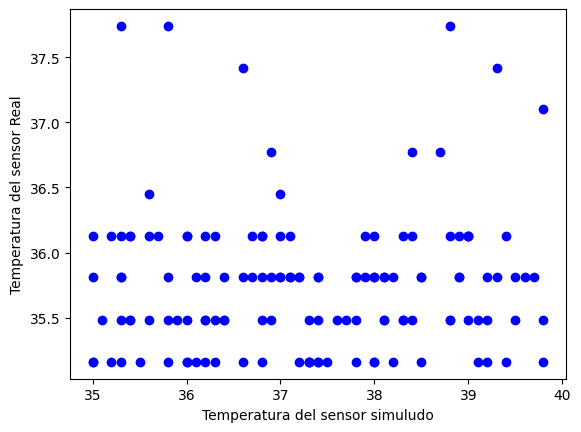

In [ ]:
import matplotlib.pyplot as plt

plt.ylabel ('Temperatura del sensor Real')
plt.xlabel ('Temperatura del sensor simuludo')
plt.scatter (datos ['sensor_simulado'],datos['sensor_real'], color='blue')
plt.show()

Interseccion (b) 35.11305367061804
Pendiente (m) [0.01737301]


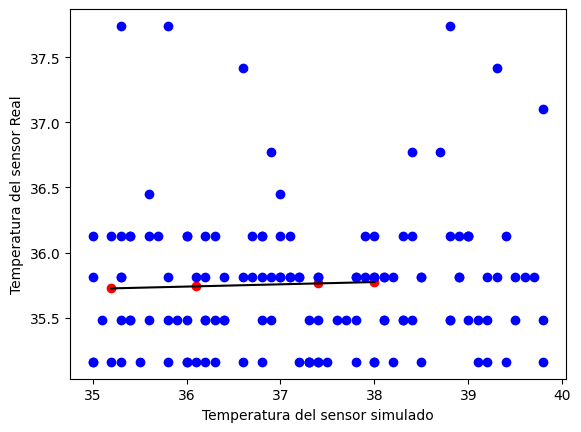

In [ ]:
from sklearn import linear_model

regresion= linear_model.LinearRegression()

tempReal = datos['sensor_simulado'].values.reshape(-1,1)
modelo= regresion.fit(tempReal,datos['sensor_real'])

print('Interseccion (b)',modelo.intercept_)
print('Pendiente (m)',modelo.coef_)

entradas =[[35.2], [36.1], [37.4], [38]]
modelo.predict(entradas)

plt.scatter(entradas,modelo.predict(entradas), color='red')
plt.plot(entradas,modelo.predict(entradas), color='black')


plt.ylabel ('Temperatura del sensor Real')
plt.xlabel ('Temperatura del sensor simulado')
plt.scatter (datos ['sensor_simulado'],datos['sensor_real'], color='blue')
plt.show()



A continuación se decide realizar un clustering el cual nos sirve para detectar patrones, identificar rangos o anomalias.
Se realizo un Clustering donde :


*   Cluster 0 = Temperatura normal
*   Cluster 1 = Temperatura elevada
*   Cluster 2 = Temperatura critica

**texto en negrita**






In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = datos[['sensor_real', 'sensor_simulado']]

kmeans = KMeans(n_clusters=3, random_state=0)


kmeans.fit(X)


datos['cluster'] = kmeans.labels_

print(datos[['sensor_real','sensor_simulado','cluster']])


     sensor_real  sensor_simulado  cluster
0          36.45             37.0        0
1          35.16             36.2        1
2          35.16             35.0        1
3          35.16             39.2        2
4          35.48             37.6        0
..           ...              ...      ...
129        35.81             38.5        2
130        37.74             35.8        1
131        37.74             38.8        2
132        37.74             35.3        1
133        36.13             37.9        0

[134 rows x 3 columns]


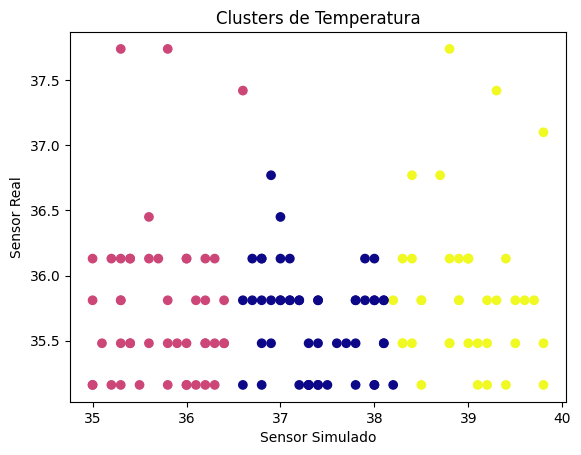

In [ ]:
plt.scatter(
    datos['sensor_simulado'],
    datos['sensor_real'],
    c=datos['cluster'],
    cmap='plasma'
)

plt.xlabel('Sensor Simulado')
plt.ylabel('Sensor Real')
plt.title('Clusters de Temperatura')
plt.show()
